In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/lsvieira2/Documents/data_analyst/Online Sales Data.csv')
df.head()


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


## Categorias de Produtos
1. **Quais são as categorias de produtos mais vendidas?**
   - Quais categorias de produtos têm o maior número de unidades vendidas?
   - Qual é a receita total gerada por cada categoria de produto?
   

In [3]:
categoria_preco = df.groupby('Product Category')['Total Revenue'].sum()
categoria_preco_asc = categoria_preco.sort_values(ascending=False)
categoria_df = categoria_preco_asc.reset_index()
categoria_df.columns = ['Categoria dos produtos', 'Total de vendas']
categoria_df.head(6)




,Categoria dos produtos,Total de vendas
0,Electronics,34982.41
1,Home Appliances,18646.16
2,Sports,14326.52
3,Clothing,8128.93
4,Beauty Products,2621.90
5,Books,1861.93


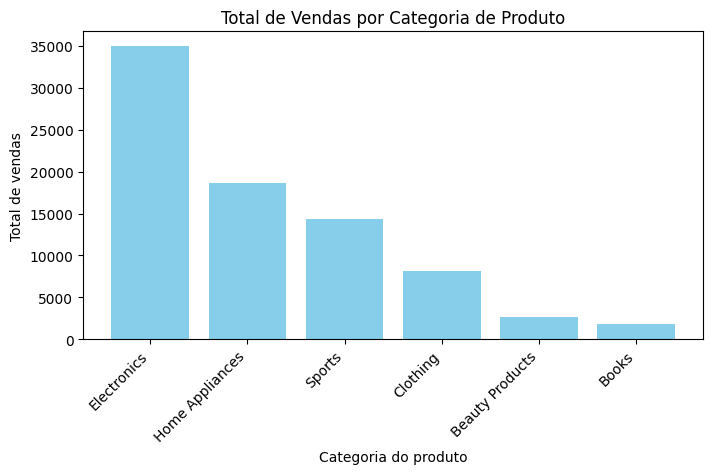

In [3]:
plt.figure(figsize=(8, 4))  
plt.bar(categoria_df['Categoria dos produtos'], categoria_df['Total de vendas'], color='skyblue')  
plt.xlabel('Categoria do produto')  
plt.ylabel('Total de vendas')  
plt.title('Total de Vendas por Categoria de Produto')  
plt.xticks(rotation=45, ha='right')  
plt.show()  

## Produtos Populares
2. **Quais são os produtos mais populares?**
   - Quais produtos específicos têm o maior número de unidades vendidas?
   - Qual é a receita total gerada por cada produto?

In [4]:
produto_preco = df.groupby('Product Name')['Total Revenue'].sum()
produto_preco_asc = produto_preco.sort_values(ascending=False)
produto_df = produto_preco_asc.reset_index()
produto_df.columns = ['Nome do produto', 'Total de vendas']
produto_10 = produto_df.head(10)
produto_10


,Nome do produto,Total de vendas
0,Canon EOS R5 Camera,3899.99
1,LG OLED TV,2599.98
2,MacBook Pro 16-inch,2499.99
3,Apple MacBook Pro 16-inch,2399.00
4,iPhone 14 Pro,1999.98
5,Peloton Bike,1895.00
6,HP Spectre x360 Laptop,1599.99
7,Roomba i7+,1599.98
8,Garmin Forerunner 945,1599.97
9,Samsung Odyssey G9 Gaming Monitor,1499.99


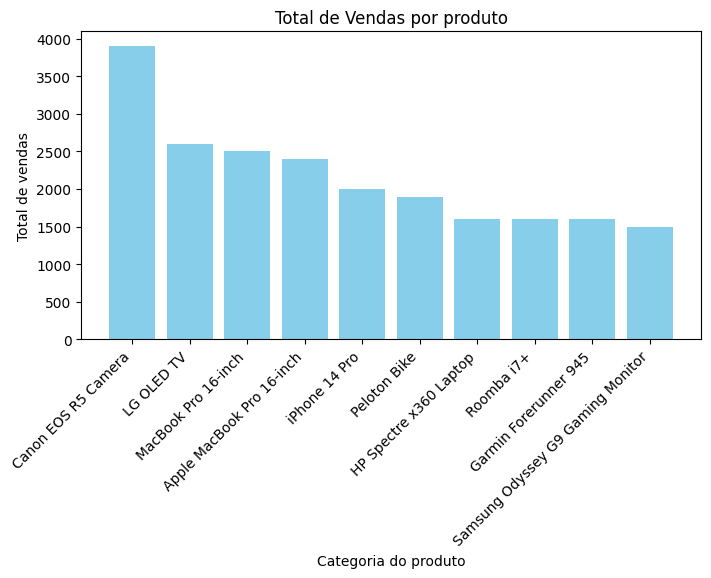

In [5]:
plt.figure(figsize=(8, 4))  
plt.bar(produto_10['Nome do produto'], produto_10['Total de vendas'], color='skyblue')  
plt.xlabel('Categoria do produto')  
plt.ylabel('Total de vendas')  
plt.title('Total de Vendas por produto')  
plt.xticks(rotation=45, ha='right')  
plt.show()  

## Análise por Região
3. **Quais regiões geram mais receita?**
   - Qual é a distribuição das vendas por região?
   - Há alguma região com desempenho notavelmente melhor ou pior?

In [6]:
regiao_vendas = df.groupby('Region')['Total Revenue'].sum()
regiao_vendas_asc = regiao_vendas.sort_values(ascending=False)
regiao_df = regiao_vendas_asc.reset_index()
regiao_df.columns = ['Regiao', 'Total de vendas']
regiao_df.head()

,Regiao,Total de vendas
0,North America,36844.34
1,Asia,22455.45
2,Europe,21268.06


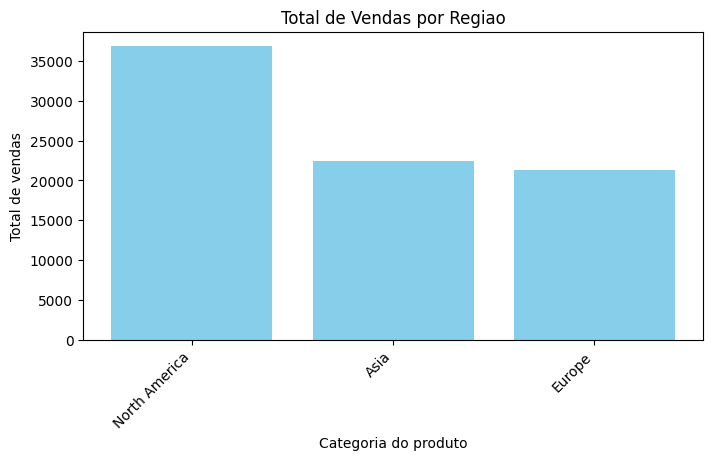

In [7]:
plt.figure(figsize=(8, 4))  
plt.bar(regiao_df['Regiao'], regiao_df['Total de vendas'], color='skyblue')  
plt.xlabel('Categoria do produto')  
plt.ylabel('Total de vendas')  
plt.title('Total de Vendas por Regiao')  
plt.xticks(rotation=45, ha='right')  
plt.show()  

In [34]:
melhor_regiao = regiao_df.loc[regiao_df['Total de vendas'].idxmax()]
pior_regiao = regiao_df.loc[regiao_df['Total de vendas'].idxmin()]
desempenho_extremos = pd.concat([melhor_regiao.to_frame().T, pior_regiao.to_frame().T], ignore_index=True)
desempenho_extremos

,Regiao,Total de vendas
0,North America,36844.34
1,Europe,21268.06


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Year,Month,Day
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024,1,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2024,1,2
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024,1,3
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2024,1,4
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2024,1,5


In [13]:
vendas_diarias = df.groupby(df['Date'].dt.date)['Total Revenue'].sum()
vendas_diarias

Date
2024-01-01    1999.98
2024-01-02     499.99
2024-01-03     209.97
2024-01-04      63.96
2024-01-05      89.99
               ...   
2024-08-23     159.99
2024-08-24     270.00
2024-08-25      32.97
2024-08-26      55.00
2024-08-27      59.98
Name: Total Revenue, Length: 240, dtype: float64

In [15]:
vendas_semanais = df.groupby(df['Date'].dt.to_period('W'))['Total Revenue'].sum()
vendas_semanais

Date
2024-01-01/2024-01-07    5513.83
2024-01-08/2024-01-14    4211.83
2024-01-15/2024-01-21    2767.84
2024-01-22/2024-01-28    1064.87
2024-01-29/2024-02-04    1569.81
2024-02-05/2024-02-11    5374.86
2024-02-12/2024-02-18    2361.86
2024-02-19/2024-02-25    1857.84
2024-02-26/2024-03-03    2028.80
2024-03-04/2024-03-10    2899.84
2024-03-11/2024-03-17    3309.86
2024-03-18/2024-03-24    1678.83
2024-03-25/2024-03-31    3560.86
2024-04-01/2024-04-07    2862.87
2024-04-08/2024-04-14    5167.84
2024-04-15/2024-04-21    1168.36
2024-04-22/2024-04-28    1802.65
2024-04-29/2024-05-05    1879.87
2024-05-06/2024-05-12    3107.74
2024-05-13/2024-05-19    2176.59
2024-05-20/2024-05-26    1633.34
2024-05-27/2024-06-02    1306.87
2024-06-03/2024-06-09    1918.86
2024-06-10/2024-06-16    1822.83
2024-06-17/2024-06-23    1984.38
2024-06-24/2024-06-30    1459.53
2024-07-01/2024-07-07    1832.86
2024-07-08/2024-07-14    1004.82
2024-07-15/2024-07-21    1294.89
2024-07-22/2024-07-28    1534.94
2024-

In [16]:
vendas_mensais = df.groupby(df['Date'].dt.to_period('M'))['Total Revenue'].sum()
vendas_mensais

Date
2024-01    14548.32
2024-02    10803.37
2024-03    12849.24
2024-04    12451.69
2024-05     8455.49
2024-06     7384.55
2024-07     6797.08
2024-08     7278.11
Freq: M, Name: Total Revenue, dtype: float64

In [17]:
media_diaria = vendas_diarias.mean()
media_diaria

np.float64(335.699375)

In [18]:
desvio_padrao_vendas_diarias = vendas_diarias.std()
desvio_padrao_vendas_diarias

np.float64(485.8044685651321)

In [ ]:
limiar = media_vendas_diarias + 2 * desvio_padrao_vendas_diarias

# Identificar picos de vendas
picos_vendas = vendas_diarias[vendas_diarias > limiar]

print("Picos de vendas diárias:")
print(picos_vendas)